# Lab 4: Classification

In this introduction to classification we will aim to understand how to apply classification algorithms to our datasets. 
Identifying the labels and values in order to predict classification targets. We will take a standard UCR dataset and look at how to split it into a train and test dataset.

Initially we will consider simple classification of datasets.
We will move on to consider how we can perform some pre-processing on our datasets to make classification more effective. 
We will then finish with looking at how we can measure the performance of our algorithms. 
Does classification accuracy tell the whole story?


## load the data

In this example we are using one of the built in UCR datasets (`Iris`).

In [53]:
#here i am using the built in datasets in sklearn.
from sklearn import datasets

#load the iris datasets
iris = datasets.load_iris()

X = iris.data   #setup the tabular data
y = iris.target #setup the labels


# Train and Test Split

When creating a classification problem we need a set of data, and an associated set of labels. 
In the case of the iris datasets we have properties of the flower, and the associated species as the label. 

In order to learn about the data we need split our dataset into a train and test split. 
The reason for doing this is because we want to learn from a set of data for which we have labels, and then measure our models effectiveness against unseen test data, for which we do have the labels. 

Here we use the sklearn function `train_test_split` to create a train and test datasets for both the data and the labels. Setting `test_size=0.2` the test set (`X_test`) will be 20% of the samples in the dataset (`X`) and the train set (`X_train`) will contain 80% of the samples. 

Consider how different train and test set sizes might affect the accuracy of a classifier. Is accuracy the best measure of model performance?



In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Pre-Processing

Before we feed the dataset to the classifier, we can perform some pre processing stages to our dataset. You should have looked at various pre-processing steps in the previous lab. 

When performing pre-processing to data that is going to be fed into a classifier, or other model that needs fitting, care must be taken.

In this example I perform `L2` normalisation on the train and test set <b>together</b>. This is important in the case of normalisation because when we calculate the mean and standard deviation for the dataset, if we normalised the dataset as separate blocks we would get potentially different values for each sample, when compared with normalising together. Additionally, It's important to normalise the test data using the mean and standard deviation of the train so that the normalisation is <b>consistent</b>. 


In [55]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)


# Classification

Here we can select the classifier to use. we show 3 simple classifiers that are commonly used in classification (there are MANY more).
In the first cell we sue a 2NN classifier, this is by setting `n_neighbours=2`. 
In the second cell we use a Support Vector Classifier with a order 3 polynomial kernel `kernel='poly'` and `degree=3`, the decision boundary will take the form:
 $$f(x) = ax^3 + bx^2 + cx + d$$

In the third cell we use a Decision Tree Classifier, where we use Entropy for the information gain (`criterion='entropy'`) to determine the splitting criteria. 

In SKLearn most classifiers are created as an object, the parameters for which are entered via the constructor, and then we have two commons functions available, the first being fit and the second being predict and predict_proba

The fit function, is where we input the train data and labels into the classifier. 
The predict and predict_proba function is where we can input our test data to receive label predictions, or a vector of probabilities for each sample, where the prediction is the argmax of the probabilities.

In [56]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=2)

In [57]:
from sklearn.svm import SVC

clf = SVC(kernel='poly', degree=3)

In [58]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')

## Fit the data to the model

Here we call the fit function as discussed earlier, passing in the train data and the train labels. 

In [59]:
clf.fit(X_train,y_train);

# Prediction

Here we call the predict function as dicussed earlier, passing in the test data, and <b>NO</b> labels

In [60]:
y_hat = clf.predict(X_test)

# Scoring

Accuracy is the simplest measure of performance we can consider for a classification model. 
We count the number of correctly predicted labels against.

Next weeks lab sheet we will consider more complex performance measures


In [63]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_hat)
accuracy


0.9666666666666667

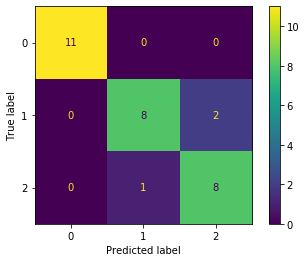

In [22]:
#Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

#we can get the confusion matrix
cm = confusion_matrix(y_test, y_hat)

#we can plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
